# Electric Potential and Plotting 3D Data

### Simulation
Go to the simulation [here](https://phet.colorado.edu/sims/html/charges-and-fields/latest/charges-and-fields_en.html); unselect "Electric Field" and select "Grid". Place some number of charges (3-4 is probably good) at various places on the screen. You can increase the strength of a charge by overlapping charges at a given point; do not place the charges on the main intersections of grid lines, as these will be the points from which you measure electric potential. Unfortunately, you will not be able to make measurements at all of the grid points, so you need to establish what area you will be using - I used an 18x8 grid, giving 18 horizontal points and 8 vertical points. Now, select the "Voltmeter" from the right and measure the electric potential at the various grid points where the main lines intersect. Start recording your data on the bottom left, go across your bottommost line to the right, and then go up one line and repeat. I recommend you record you data as follows; the reason will become clear shortly:

(00,01,02,03,04,05,06,07,08,09,0a,0b,0c,0d,0e,0f) - first horizontal line (bottommost)

(10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f) - second horizontal line (second from the bottom)

...

(70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f) - eighth horizontal line (topmost)

With the data collected from the simulation, you now need a way to represent this visually in some sort of meaningful way. The problem is that you have a two-dimensional grid of points for position, and then another list of points for the potential at each position. So, how can we represent this data?

### Organization
The first step is going to be to organize everything into a usable manner. The code below is going to generate two different lists, X and Y. As you may have guessed, X will contain the values for the horizontal position and Y will contain the values for the vertical position. Go ahead and run this code and see what it prints out for X and Y.


In [32]:
import numpy as np

X = np.arange(0, 12, 1)
Y = np.arange(0, 7, 1)
X, Y = np.meshgrid(X, Y)

print(X)
print(Y)


[[-6 -5 -4 -3 -2 -1  0  1  2  3  4  5]
 [-6 -5 -4 -3 -2 -1  0  1  2  3  4  5]
 [-6 -5 -4 -3 -2 -1  0  1  2  3  4  5]
 [-6 -5 -4 -3 -2 -1  0  1  2  3  4  5]
 [-6 -5 -4 -3 -2 -1  0  1  2  3  4  5]
 [-6 -5 -4 -3 -2 -1  0  1  2  3  4  5]
 [-6 -5 -4 -3 -2 -1  0  1  2  3  4  5]]
[[-3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3]
 [-2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  1  1  1  1  1  1  1  1  1  1  1]
 [ 2  2  2  2  2  2  2  2  2  2  2  2]
 [ 3  3  3  3  3  3  3  3  3  3  3  3]]


You can see that the arrangement is slightly different in the two lists. The reason for this should be clear if you imagine the first row of Y being "mapped" onto the first row of X. This will create a set of ordered pairs (-6,-3) (-5,-3) (-4,-3) (-3,-3) (-2,-3) (-1,-3) (0,-3) (1,-3) (2,-3) (3,-3) (4,-3) (5,-3) which form the basis for the values closest to the bottom of the x-y grid plane. Then, if we repeated this for the other rows of X and Y we would end up with a collection of all the orderded pairs for the x-y plane. You do not have to actually bother doing this, as it is all taken care of by the plotting function we will use.

So now all we need to do is give the plotting function a list of the values at all of these different points. We just need to organize the data in such a way that it matches what will happen when the function combines X and Y - this can be done by creating a "list of lists" where the first list contains the values for when y=-3 and the last list contains the values for when y=+3.

Now that the data is properly organized, we need to decide how to present it.

### Contour Plot
The first possibility is to use something known as a contour plot, which is something that you may have actually seen before in a different context. This will generate a 2D representation of the 3D data, by using lines (and in this situation color) to represent the Z values. This is what a topographic map does, but in that case the lines represent elevation instead of electric potential.

![topo map](https://upload.wikimedia.org/wikipedia/commons/f/fa/Cntr-map-1.jpg)

If you run the code below, you will see a contour plot generated for the given Z values. This will produce a relatively boring graph, showing the values changing in the vertial direction only. This could represent an incline sloped upwards (with no deviation along the x-direction) or the electric potential within a uniform electric field.

[ 0  1  2  3  4  5  6  7  8  9 10 11]
[0 1 2 3 4 5 6]
((1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1), (2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2), (3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3), (4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4), (5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5), (6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6), (7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7))


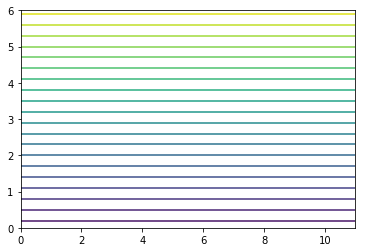

In [51]:
import numpy as np
import matplotlib.pyplot as plt


X = np.arange(0, 12, 1)
Y = np.arange(0, 7, 1)
Z = ((1,1,1,1,1,1,1,1,1,1,1,1),(2,2,2,2,2,2,2,2,2,2,2,2),(3,3,3,3,3,3,3,3,3,3,3,3),
     (4,4,4,4,4,4,4,4,4,4,4,4),(5,5,5,5,5,5,5,5,5,5,5,5),(6,6,6,6,6,6,6,6,6,6,6,6),(7,7,7,7,7,7,7,7,7,7,7,7))

print(X)
print(Y)
print(Z)

plt.contour(X,Y,Z, 20)

plt.show()

Feel free to mess around with the Z-values to get an idea of what is happening here.

So, can we create a contour plot of something more interesting, like a single point charge or hill on a topo? Sure, but as that would be radiating outward the values will not match up nicely with our square grid, so let's just make a pyramid shape.

[0 1 2 3 4 5 6]
[0 1 2 3 4 5 6]
((1, 1, 1, 1, 1, 1, 1), (1, 1, 1, 2, 1, 1, 1), (1, 1, 2, 3, 2, 1, 1), (1, 2, 3, 4, 3, 2, 1), (1, 1, 2, 3, 2, 1, 1), (1, 1, 1, 2, 1, 1, 1), (1, 1, 1, 1, 1, 1, 1))


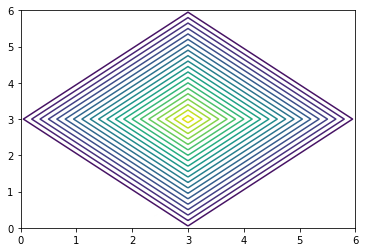

In [50]:
import numpy as np
import matplotlib.pyplot as plt


X = np.arange(0, 7, 1)
Y = np.arange(0, 7, 1)
Z = ((1,1,1,1,1,1,1),(1,1,1,2,1,1,1),(1,1,2,3,2,1,1),
     (1,2,3,4,3,2,1),(1,1,2,3,2,1,1),(1,1,1,2,1,1,1),(1,1,1,1,1,1,1))

print(X)
print(Y)
print(Z)

plt.contour(X,Y,Z, 20)

plt.show()

Again, feel free to mess around with this data for a minute or two.

Cool. You know what would be even more interesting to try to plot? How about your electric potential data? You may need to change the X and Y values to match your data, and may need to exclude or add some data from your orientation of point charges.

### 3-Dimensional Plots
Now, let's look at trying to produce more of a traditional 3D plot. There are a couple different options for this, but let's start out with a simple plot of the data. The data below is mine for three different point charges on a 7x7 grid.

[[0 1 2 3 4 5 6]
 [0 1 2 3 4 5 6]
 [0 1 2 3 4 5 6]
 [0 1 2 3 4 5 6]
 [0 1 2 3 4 5 6]
 [0 1 2 3 4 5 6]
 [0 1 2 3 4 5 6]]
[[0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1]
 [2 2 2 2 2 2 2]
 [3 3 3 3 3 3 3]
 [4 4 4 4 4 4 4]
 [5 5 5 5 5 5 5]
 [6 6 6 6 6 6 6]]
((7.9, 9.2, 10.4, 11.3, 12.0, 12.8, 12.7), (9.3, 11.7, 13.9, 14.7, 15.5, 17.7, 18.8), (10.7, 16.2, 22.8, 19.9, 19.7, 27.1, 37.1), (11.4, 21.0, 50.0, 24.1, 21.0, 36.3, 50.0), (9.9, 14.7, 20.1, 15.9, 15.2, 22.7, 33.2), (7.7, 9.0, 8.9, 5.0, 0.6, 8.1, 14.1), (5.8, 5.8, 4.1, -4.0, -50.0, -2.2, 6.6))


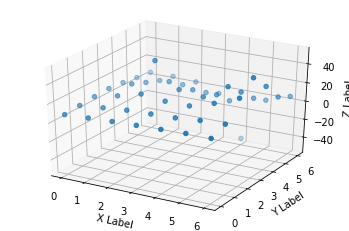

In [49]:
import numpy as np
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
n = 100

X = np.arange(0, 7, 1)
Y = np.arange(0, 7, 1)
X, Y = np.meshgrid(X, Y)
Z = ((7.9,9.2,10.4,11.3,12.0,12.8,12.7),(9.3,11.7,13.9,14.7,15.5,17.7,18.8),
     (10.7,16.2,22.8,19.9,19.7,27.1,37.1),(11.4,21.0,50.0,24.1,21.0,36.3,50.0),
     (9.9,14.7,20.1,15.9,15.2,22.7,33.2),(7.7,9.0,8.9,5.0,0.6,8.1,14.1),
     (5.8,5.8,4.1,-4.0,-50.0,-2.2,6.6))

print(X)
print(Y)
print(Z)

ax.scatter(X,Y,Z)


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

Ok, that's nice, but not very useful. Let's try "connecting" the points.*

\* *I am still working on getting this one working here*

[[0 1 2 3 4 5 6]
 [0 1 2 3 4 5 6]
 [0 1 2 3 4 5 6]
 [0 1 2 3 4 5 6]
 [0 1 2 3 4 5 6]
 [0 1 2 3 4 5 6]
 [0 1 2 3 4 5 6]]
[[0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1]
 [2 2 2 2 2 2 2]
 [3 3 3 3 3 3 3]
 [4 4 4 4 4 4 4]
 [5 5 5 5 5 5 5]
 [6 6 6 6 6 6 6]]
((7.9, 9.2, 10.4, 11.3, 12.0, 12.8, 12.7), (9.3, 11.7, 13.9, 14.7, 15.5, 17.7, 18.8), (10.7, 16.2, 22.8, 19.9, 19.7, 27.1, 37.1), (11.4, 21.0, 50.0, 24.1, 21.0, 36.3, 50.0), (9.9, 14.7, 20.1, 15.9, 15.2, 22.7, 33.2), (7.7, 9.0, 8.9, 5.0, 0.6, 8.1, 14.1), (5.8, 5.8, 4.1, -4.0, -50.0, -2.2, 6.6))


AttributeError: 'tuple' object has no attribute 'ndim'

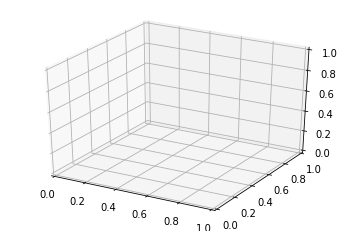

In [47]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure()
ax = fig.gca(projection='3d')

X = np.arange(0, 7, 1)
Y = np.arange(0, 7, 1)
X, Y = np.meshgrid(X, Y)
Z = ((7.9,9.2,10.4,11.3,12.0,12.8,12.7),(9.3,11.7,13.9,14.7,15.5,17.7,18.8),
     (10.7,16.2,22.8,19.9,19.7,27.1,37.1),(11.4,21.0,50.0,24.1,21.0,36.3,50.0),
     (9.9,14.7,20.1,15.9,15.2,22.7,33.2),(7.7,9.0,8.9,5.0,0.6,8.1,14.1),
     (5.8,5.8,4.1,-4.0,-50.0,-2.2,6.6))

print(X)
print(Y)
print(Z)

surf = ax.plot_surface(X,Y,Z, rstride=1, cstride=1,cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_zlim(-55,55)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf,shrink=0.5,aspect=5)
plt.show()

Finally, let's try a 3D contour plot to represent the data.

[[0 1 2 3 4 5 6]
 [0 1 2 3 4 5 6]
 [0 1 2 3 4 5 6]
 [0 1 2 3 4 5 6]
 [0 1 2 3 4 5 6]
 [0 1 2 3 4 5 6]
 [0 1 2 3 4 5 6]]
[[0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1]
 [2 2 2 2 2 2 2]
 [3 3 3 3 3 3 3]
 [4 4 4 4 4 4 4]
 [5 5 5 5 5 5 5]
 [6 6 6 6 6 6 6]]
((7.9, 9.2, 10.4, 11.3, 12.0, 12.8, 12.7), (9.3, 11.7, 13.9, 14.7, 15.5, 17.7, 18.8), (10.7, 16.2, 22.8, 19.9, 19.7, 27.1, 37.1), (11.4, 21.0, 50.0, 24.1, 21.0, 36.3, 50.0), (9.9, 14.7, 20.1, 15.9, 15.2, 22.7, 33.2), (7.7, 9.0, 8.9, 5.0, 0.6, 8.1, 14.1), (5.8, 5.8, 4.1, -4.0, -50.0, -2.2, 6.6))


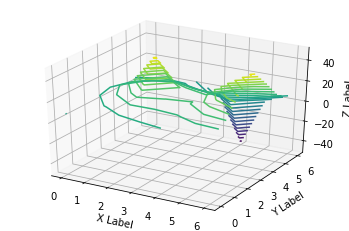

In [53]:
import numpy as np
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
n = 100

X = np.arange(0, 7, 1)
Y = np.arange(0, 7, 1)
X, Y = np.meshgrid(X, Y)
Z = ((7.9,9.2,10.4,11.3,12.0,12.8,12.7),(9.3,11.7,13.9,14.7,15.5,17.7,18.8),
     (10.7,16.2,22.8,19.9,19.7,27.1,37.1),(11.4,21.0,50.0,24.1,21.0,36.3,50.0),
     (9.9,14.7,20.1,15.9,15.2,22.7,33.2),(7.7,9.0,8.9,5.0,0.6,8.1,14.1),
     (5.8,5.8,4.1,-4.0,-50.0,-2.2,6.6))

print(X)
print(Y)
print(Z)

ax.contour(X,Y,Z,30)


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()